# Books

Quantum Computation and Quantum Information - Michael A. Nielsen & Isaac L. Chuang - Cambridge University Press (CIRQ)

Quantum Computer Science: An Introduction - N. David Mermin - Cambridge

In [62]:
# SOURCE: https://quantumai.google/cirq

import cirq

# Pick a qubit.
qubit = cirq.GridQubit(0, 0)

# Create a circuit
circuit = cirq.Circuit(
    cirq.X(qubit)**0.5,  # Square root of NOT.
    cirq.measure(qubit, key='m')  # Measurement.
)
print("Circuit:")
print(circuit)

# Simulate the circuit several times.
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("Results:")
print(result)


Circuit:
(0, 0): ───X^0.5───M('m')───
Results:
m=11100110100010111101


# Qubits


Qubits

The first part of creating a quantum circuit is to define a set of qubits (also known as a quantum register) to act on.

Cirq has three main ways of defining qubits:

    cirq.NamedQubit: used to label qubits by an abstract name.
    cirq.LineQubit: qubits labelled by number in a linear array.
    cirq.GridQubit: qubits labelled by two numbers in a rectangular lattice.

Here are some examples of defining each type of qubit.

In [63]:
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

# Line qubits can be created individually
q3 = cirq.LineQubit(3)

# Or created in a range
# This will create LineQubit(0), LineQubit(1), LineQubit(2)
q0, q1, q2 = cirq.LineQubit.range(3)

# Grid Qubits can also be referenced individually
q4_5 = cirq.GridQubit(4, 5)

# Or created in bulk in a square
# This will create 16 qubits from (0,0) to (3,3)
qubits = cirq.GridQubit.square(4)
qubits

[cirq.GridQubit(0, 0),
 cirq.GridQubit(0, 1),
 cirq.GridQubit(0, 2),
 cirq.GridQubit(0, 3),
 cirq.GridQubit(1, 0),
 cirq.GridQubit(1, 1),
 cirq.GridQubit(1, 2),
 cirq.GridQubit(1, 3),
 cirq.GridQubit(2, 0),
 cirq.GridQubit(2, 1),
 cirq.GridQubit(2, 2),
 cirq.GridQubit(2, 3),
 cirq.GridQubit(3, 0),
 cirq.GridQubit(3, 1),
 cirq.GridQubit(3, 2),
 cirq.GridQubit(3, 3)]

In [64]:
import cirq_google
print(cirq_google.Sycamore)


                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

Gates and operations

The next step is to use the qubits to create operations that can be used in the circuit. Cirq has two concepts that are important to understand here:

    A Gate is an effect that can be applied to a set of qubits.
    An Operation is a gate applied to a set of qubits.

For instance, cirq.H is the quantum Hadamard and is a Gate object. cirq.H(cirq.LineQubit(1)) is an Operation object and is the Hadamard gate applied to a specific qubit (line qubit number 1).

Many textbook gates are included within cirq. cirq.X, cirq.Y, and cirq.Z refer to the single-qubit Pauli gates. cirq.CZ, cirq.CNOT, cirq.SWAP are a few of the common two-qubit gates. cirq.measure is a macro to apply a MeasurementGate to a set of qubits. You can find more, as well as instructions on how to create your own custom gates, on the Gates documentation page.

Here are some examples of operations that can be performed on gates and operations:

In [65]:
# Example gates
cnot_gate = cirq.CNOT
pauli_z = cirq.Z

print(cnot_gate)

CNOT


In [66]:
# Use exponentiation to get square root gates.
sqrt_x_gate = cirq.X**0.5
print(sqrt_x_gate)

X**0.5


In [67]:

# Some gates can also take parameters
sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

# Create two qubits at once, in a line.
q0, q1 = cirq.LineQubit.range(2)

# Example operations
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = cirq.SQRT_ISWAP(q0, q1)
print(sqrt_iswap_op)


ISWAP**0.5(q(0), q(1))


In [68]:
# You can also use the gates you specified earlier.
cnot_op = cnot_gate(q0, q1)
pauli_z_op = pauli_z(q0)
sqrt_x_op = sqrt_x_gate(q0)
sqrt_sqrt_y_op = sqrt_sqrt_y(q0)
print(sqrt_sqrt_y_op)

Y**0.25(q(0))


# Circuits and moments


Circuits and moments

You are now ready to construct a quantum circuit. A Circuit is a collection of Moments. A Moment is a collection of Operations that all act during the same abstract time slice. Each Operation must be applied to a disjoint set of qubits compared to each of the other Operations in the Moment. A Moment can be thought of as a vertical slice of a quantum circuit diagram.

Circuits can be constructed in several different ways. By default, Cirq will attempt to slide your operation into the earliest possible Moment when you insert it. You can use the append function in two ways:

By appending each operation one-by-one: 

In [69]:
circuit = cirq.Circuit()
qubits = cirq.LineQubit.range(3)
circuit.append(cirq.H(qubits[0]))
circuit.append(cirq.H(qubits[1]))
circuit.append(cirq.H(qubits[2]))
print(circuit)


0: ───H───

1: ───H───

2: ───H───


In [70]:
# OR

circuit = cirq.Circuit()
ops = [cirq.H(q) for q in cirq.LineQubit.range(3)]
circuit.append(ops)
print(circuit)


0: ───H───

1: ───H───

2: ───H───


In [71]:
print(cirq.Circuit(cirq.SWAP(q, q + 1) for q in cirq.LineQubit.range(3)))


0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


In [72]:

print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))


0: ───H───────────

1: ───────H───────

2: ───────────H───


# Circuits and devices



One important consideration when using real quantum devices is that there are often constraints on circuits that are able to be run on the hardware. Device objects specify these constraints and can be used to validate your circuit to make sure that it contains no illegal operations. For more information on what constraints Device objects can specify and how to use them, see the Devices page.

The following example demonstrates this with the Sycamore Device:

In [73]:
# Create some qubits.
q0 = cirq.GridQubit(5, 6)
q1 = cirq.GridQubit(5, 5)
q2 = cirq.GridQubit(4, 5)

# Create operations using the Sycamore gate, which is supported by the Sycamore device.
# However, create operations for both adjacent and non-adjacent qubit pairs.
adjacent_op = cirq_google.SYC(q0, q1)
nonadjacent_op = cirq_google.SYC(q0, q2)

# A working circuit for the Sycamore device raises no issues.
working_circuit = cirq.Circuit()
working_circuit.append(adjacent_op)
valid = cirq_google.Sycamore.validate_circuit(working_circuit)

# A circuit using invalid operations.
bad_circuit = cirq.Circuit()
bad_circuit.append(nonadjacent_op)
try:
    cirq_google.Sycamore.validate_circuit(bad_circuit)
except ValueError as e:
    print(e)


Qubit pair is not valid on device: (cirq.GridQubit(5, 6), cirq.GridQubit(4, 5)).


# Simulation



The results of the application of a quantum circuit can be calculated by a Simulator. Cirq comes bundled with a simulator that can calculate the results of circuits up to about a limit of 20 qubits. It can be initialized with cirq.Simulator().

There are two different approaches to using a simulator:

    simulate(): When classically simulating a circuit, a simulator can directly access and view the resulting wave function. This is useful for debugging, learning, and understanding how circuits will function.
    run(): When using actual quantum devices, we can only access the end result of a computation and must sample the results to get a distribution of results. Running the simulator as a sampler mimics this behavior and only returns bit strings as output.

Next simulate a 2-qubit "Bell State":

In [74]:
# Create a circuit to generate a Bell State:
# 1/sqrt(2) * ( |00⟩ + |11⟩ )
bell_circuit = cirq.Circuit()
q0, q1 = cirq.LineQubit.range(2)
bell_circuit.append(cirq.H(q0))
bell_circuit.append(cirq.CNOT(q0, q1))

# Initialize Simulator
s = cirq.Simulator()

print('Simulate the circuit:')
results = s.simulate(bell_circuit)
print(results)

# For sampling, we need to add a measurement at the end
bell_circuit.append(cirq.measure(q0, q1, key='result'))

# Sample the circuit
samples = s.run(bell_circuit, repetitions=1000)

Simulate the circuit:
measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: 0.707|00⟩ + 0.707|11⟩

phase:
output vector: |⟩


# Virtual Machine Simulation



Cirq also provides the Quantum Virtual Machine, which is a simulated virtual version of quantum hardware devices. It consists of two primary components:

https://quantumai.google/cirq/simulate/virtual_engine_interface

    A virtual Engine interface that enables you to verify and run circuits with the same interface that quantum hardware would have.
    A set of noise models that try to realistically replicate the noise present in actual Google quantum hardware devices.

The QVM is intended to serve as a replacement for the Google quantum hardware, in two cases:

    Running your circuit on a QVM can give an approximation of how your circuit runs under the influence of hardware-like noise. This can be useful to help you reconfigure or change your circuit to be less impacted by noise when run on actual quantum hardware.
    During the preparation process before running your circuit(s) on hardware, you can seamlessly use a QVM to test that your workflow or pipeline works before eventually switching to the nearly-identical hardware interface.

Read more about the QVM and its uses in the Quantum Virtual Machine page, or just start using it with the QVM Creation Template page.

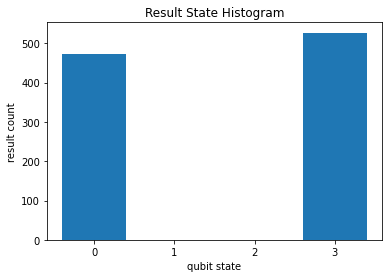

Counter({3: 527, 0: 473})


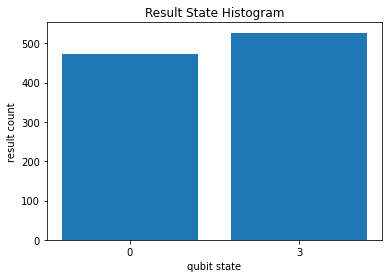

In [75]:
import matplotlib.pyplot as plt

cirq.plot_state_histogram(samples, plt.subplot())
plt.show()

# Pull of histogram counts from the result data structure
counts = samples.histogram(key='result')
print(counts)

# Graph the histogram counts instead of the results
cirq.plot_state_histogram(counts, plt.subplot())
plt.show()



Using parameter sweeps

Cirq circuits allow for gates to have symbols as free parameters within the circuit. This is especially useful for variational algorithms, which vary parameters within the circuit in order to optimize a cost function, but it can be useful in a variety of circumstances.

For parameters, Cirq uses the library sympy to add sympy.Symbol as parameters to gates and operations.

Once the circuit is complete, you can fill in the possible values of each of these parameters with a Sweep. There are several possibilities that can be used as a sweep:

    cirq.Points: A list of manually specified values for one specific symbol as a sequence of floats.
    cirq.Linspace: A linear sweep from a starting value to an ending value.
    cirq.ListSweep: A list of manually specified values for several different symbols, specified as a list of dictionaries.
    cirq.Zip and cirq.Product: Sweeps can be combined list-wise by zipping them together or through their Cartesian product.

A parameterized circuit and sweep together can be run using the simulator or other sampler by changing run() to run_sweep() and adding the sweep as a parameter.

Here is an example of sweeping an exponent of a X gate:

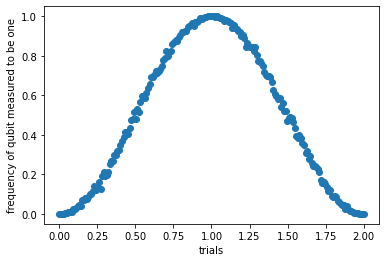

In [76]:
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1, 1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'), cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t', 'p', data={'t': x_data, 'p': y_data})
plt.xlabel("trials")
plt.ylabel("frequency of qubit measured to be one")
plt.show()


Unitary matrices and decompositions
Many quantum operations have unitary matrix representations. This matrix can be accessed by applying cirq.unitary(operation) to that operation. This can be applied to gates, operations, and circuits that support this protocol and will return the unitary matrix that represents the object. See Protocols for more about this and other protocols.

In [77]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))


Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


# Decompositions



Many gates can be decomposed into an equivalent circuit with simpler operations and gates. This is called decomposition and can be accomplished with the cirq.decompose protocol.

For instance, a Hadamard H gate can be decomposed into X and Y gates:

In [78]:
print(cirq.decompose(cirq.H(cirq.LineQubit(0))))


[(cirq.Y**0.5).on(cirq.LineQubit(0)), cirq.XPowGate(global_shift=-0.25).on(cirq.LineQubit(0))]


# Transformers



The last concept in this tutorial is the transformer. A transformer can take a circuit and modify it. Usually, this will entail combining or modifying operations to make it more efficient and shorter, though a transformer can, in theory, do any sort of circuit manipulation.

For example, the cirq.merge_single_qubit_gates_to_phxz transformer will take consecutive single-qubit operations and merge them into a single PhasedXZ operation.

In [79]:
q = cirq.GridQubit(1, 1)
c = cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print(c)
c = cirq.merge_single_qubit_gates_to_phxz(c)
print(c)


(1, 1): ───X^0.25───Y^0.25───T───
(1, 1): ───PhXZ(a=0.304,x=0.333,z=0.142)───


Build a circuit
At the core of Cirq is the ability to construct quantum circuits. These are the methods and data structures necessary to do so.

Circuit construction
The core data structures that compose a circuit and how to use them. 



# CIRCUITS


Conceptual overview
The primary representation of quantum programs in Cirq is the Circuit class. A Circuit is a collection of Moments. A Moment is a collection of Operations that all act during the same abstract time slice. An Operation is some effect that operates on a specific subset of Qubits; the most common type of Operation is a GateOperation.

In [80]:
qubits = cirq.GridQubit.square(3)

print(qubits[0])
print(qubits)


q(0, 0)
[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2)]


The primary representation of quantum programs in Cirq is the Circuit class. A Circuit is a collection of Moments. A Moment is a collection of Operations that all act during the same abstract time slice. An Operation is some effect that operates on a specific subset of Qubits; the most common type of Operation is a GateOperation.



# Circuits and Moments



Let's unpack this.

At the base of this construction is the notion of a qubit. In Cirq, qubits and other quantum objects are identified by instances of subclasses of the cirq.Qid base class. Different subclasses of Qid can be used for different purposes. For example, the qubits that Google’s devices use are often arranged on the vertices of a square grid. For this, the class cirq.GridQubit subclasses cirq.Qid. For example, you can create a 3 by 3 grid of qubits using:

In [81]:
img = mpimg.imread('/home/theone/other_models/Quantum/CircuitMomentOperation.png')
imgplot = plt.imshow(img)
plt.show()

NameError: name 'mpimg' is not defined

Let's unpack this.

At the base of this construction is the notion of a qubit. In Cirq, qubits and other quantum objects are identified by instances of subclasses of the cirq.Qid base class. Different subclasses of Qid can be used for different purposes. For example, the qubits that Google’s devices use are often arranged on the vertices of a square grid. For this, the class cirq.GridQubit subclasses cirq.Qid. For example, you can create a 3 by 3 grid of qubits using:

The next level up is the notion of cirq.Gate. A cirq.Gate represents a physical process that occurs on a qubit. The important property of a gate is that it can be applied to one or more qubits. This can be done via the gate.on(*qubits) method itself or via gate(*qubits). Doing this turns a cirq.Gate into a cirq.Operation.

In [ ]:
qubits = cirq.GridQubit.square(3)

print(qubits[0])
print(qubits)


q(0, 0)
[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(1, 0), cirq.GridQubit(1, 1), cirq.GridQubit(1, 2), cirq.GridQubit(2, 0), cirq.GridQubit(2, 1), cirq.GridQubit(2, 2)]


In [ ]:
# This is an Pauli X gate. It is an object instance.
x_gate = cirq.X
# Applying it to the qubit at location (0, 0) (defined above)
# turns it into an operation.
x_op = x_gate(qubits[0])

print(x_op)


X(q(0, 0))


A cirq.Moment is simply a collection of operations, each of which operates on a different set of qubits, and which conceptually represents these operations as occurring during this abstract time slice. The Moment structure itself is not required to be related to the actual scheduling of the operations on a quantum computer or via a simulator, though it can be. For example, here is a Moment in which Pauli X and a CZ gate operate on three qubits:

In [ ]:
cz = cirq.CZ(qubits[0], qubits[1])
x = cirq.X(qubits[2])
moment = cirq.Moment(x, cz)

print(moment)


  ╷ 0 1 2
╶─┼───────
0 │ @─@ X
  │


The above is not the only way one can construct moments, nor even the typical method, but illustrates that a Moment is just a collection of operations on disjoint sets of qubits.

Finally, at the top level, a cirq.Circuit is an ordered series of cirq.Moment objects. The first Moment in this series contains the first Operations that will be applied. Here, for example, is a simple circuit made up of two moments:

In [ ]:
cz01 = cirq.CZ(qubits[0], qubits[1])
x2 = cirq.X(qubits[2])
cz12 = cirq.CZ(qubits[1], qubits[2])
moment0 = cirq.Moment([cz01, x2])
moment1 = cirq.Moment([cz12])
circuit = cirq.Circuit((moment0, moment1))

print(circuit)


(0, 0): ───@───────
           │
(0, 1): ───@───@───
               │
(0, 2): ───X───@───


# Constructing circuits



Constructing Circuits as a series of hand-crafted Moment objects is tedious. Instead, Cirq provides a variety of different ways to create a Circuit.

One of the most useful ways to construct a Circuit is by appending onto the Circuit with the Circuit.append method.

In [ ]:
q0, q1, q2 = [cirq.GridQubit(i, 0) for i in range(3)]
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1), cirq.H(q2)])

print(circuit)


(0, 0): ───@───
           │
(1, 0): ───@───

(2, 0): ───H───


In [ ]:
circuit.append([cirq.H(q0), cirq.CZ(q1, q2)])

print(circuit)


(0, 0): ───@───H───
           │
(1, 0): ───@───@───
               │
(2, 0): ───H───@───


# InsertStrategies



cirq.InsertStrategy defines how Operations are placed in a Circuit when requested to be inserted at a given location. Here, a location is identified by the index of the Moment (in the Circuit) where the insertion is requested to be placed at (in the case of Circuit.append, this means inserting at the Moment, at an index one greater than the maximum moment index in the Circuit).

There are four such strategies: InsertStrategy.EARLIEST, InsertStrategy.NEW, InsertStrategy.INLINE and InsertStrategy.NEW_THEN_INLINE.

InsertStrategy.EARLIEST, which is the default, is defined as:

Scans backward from the insert location until a moment with operations touching qubits affected by the operation to insert is found. The operation is added to the moment just after that location.

For example, if you first create an Operation in a single moment, and then use InsertStrategy.EARLIEST, the Operation can slide back to this first Moment if there is space:

In [ ]:
from cirq.circuits import InsertStrategy

circuit = cirq.Circuit()
circuit.append([cirq.CZ(q0, q1)])
circuit.append([cirq.H(q0), cirq.H(q2)], strategy=InsertStrategy.EARLIEST)

print(circuit)


(0, 0): ───@───H───
           │
(1, 0): ───@───────

(2, 0): ───H───────


After creating the first moment with a CZ gate, the second append uses the InsertStrategy.EARLIEST strategy. The H on q0 cannot slide back, while the H on q2 can and so ends up in the first Moment.

Contrast this with InsertStrategy.NEW that is defined as:

Every operation that is inserted is created in a new moment.

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)], strategy=InsertStrategy.NEW)

print(circuit)


(0, 0): ───H───────────

(1, 0): ───────H───────

(2, 0): ───────────H───


Here every operator processed by the append ends up in a new moment. InsertStrategy.NEW is most useful when you are inserting a single operation and do not want it to interfere with other Moments.

Another strategy is InsertStrategy.INLINE:

Attempts to add the operation to insert into the moment just before the desired insert location. But, if there’s already an existing operation affecting any of the qubits touched by the operation to insert, a new moment is created instead.

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.CZ(q1, q2)])
circuit.append([cirq.CZ(q1, q2)])
circuit.append([cirq.H(q0), cirq.H(q1), cirq.H(q2)], strategy=InsertStrategy.INLINE)

print(circuit)


(0, 0): ───────H───────

(1, 0): ───@───@───H───
           │   │
(2, 0): ───@───@───H───


After two initial CZ between the second and third qubit, the example inserts three H operations. The H on the first qubit is inserted into the previous Moment, but the H on the second and third qubits cannot be inserted into the previous Moment, so a new Moment is created.

Finally, InsertStrategy.NEW_THEN_INLINE is a useful strategy to start a new moment and then continue inserting from that point onwards.

Creates a new moment at the desired insert location for the first operation, but then switches to inserting operations according to InsertStrategy.INLINE.

In [ ]:
circuit = cirq.Circuit()
circuit.append([cirq.H(q0)])
circuit.append([cirq.CZ(q1, q2), cirq.H(q0)], strategy=InsertStrategy.NEW_THEN_INLINE)

print(circuit)


(0, 0): ───H───H───

(1, 0): ───────@───
               │
(2, 0): ───────@───


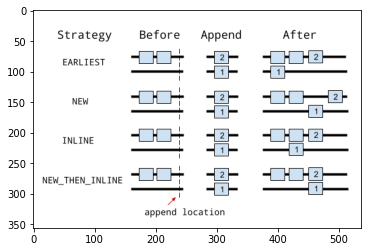

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/home/theone/other_models/Quantum/InsertStrategy.png')
imgplot = plt.imshow(img)
plt.show()


Patterns for arguments to append and insert
In the above examples, you used a series of Circuit.append calls with a list of different Operations added to the circuit. However, the argument where you have supplied a list can also take more than just list values. For instance:

In [ ]:
def my_layer():
    yield cirq.CZ(q0, q1)
    yield [cirq.H(q) for q in (q0, q1, q2)]
    yield [cirq.CZ(q1, q2)]
    yield [cirq.H(q0), [cirq.CZ(q1, q2)]]


circuit = cirq.Circuit()
circuit.append(my_layer())

for x in my_layer():
    print(x)


CZ(q(0, 0), q(1, 0))
[cirq.H(cirq.GridQubit(0, 0)), cirq.H(cirq.GridQubit(1, 0)), cirq.H(cirq.GridQubit(2, 0))]
[cirq.CZ(cirq.GridQubit(1, 0), cirq.GridQubit(2, 0))]
[cirq.H(cirq.GridQubit(0, 0)), [cirq.CZ(cirq.GridQubit(1, 0), cirq.GridQubit(2, 0))]]


In [ ]:
print(circuit)


(0, 0): ───@───H───H───────
           │
(1, 0): ───@───H───@───@───
                   │   │
(2, 0): ───H───────@───@───


Recall that Python functions with a yield are generators. Generators are functions that act as iterators. The above example iterates over my_layer() with a for loop. In this case, each of the yields produces:



# Operations

    Operations,
    lists of Operations,
    or lists of Operations mixed with lists of Operations.

When you pass an iterator to the append method, Circuit is able to flatten all of these and pass them as one giant list to Circuit.append (this also works for Circuit.insert).

The above idea uses the concept of cirq.OP_TREE. An OP_TREE is not a class, but a contract. The basic idea is that, if the input can be iteratively flattened into a list of operations, then the input is an OP_TREE.

A very nice pattern emerges from this structure: define generators for sub-circuits, which can vary by size or Operation parameters.


Slicing and iterating over circuits

Circuits can be iterated over and sliced. When they are iterated, each item in the iteration is a moment:


In [ ]:
circuit = cirq.Circuit(cirq.H(q0), cirq.CZ(q0, q1))
for moment in circuit:
    print(moment)


  ╷ 0
╶─┼───
0 │ H
  │
  ╷ 0
╶─┼───
0 │ @
  │ │
1 │ @
  │


Slicing a Circuit, on the other hand, produces a new Circuit with only the moments corresponding to the slice:

In [ ]:
circuit = cirq.Circuit(cirq.H(q0), cirq.CZ(q0, q1), cirq.H(q1), cirq.CZ(q0, q1))
print(circuit[1:3])


(0, 0): ───@───────
           │
(1, 0): ───@───H───


Two especially useful applications of this are dropping the last moment (which are often just measurements): circuit[:-1], and reversing a circuit: circuit[::-1].
Nesting circuits with CircuitOperation

Circuits can be nested inside one another with cirq.CircuitOperation. This is useful for concisely defining large, repetitive circuits, as the repeated section can be defined once and then be reused elsewhere. Circuits that need to be serialized especially benefit from this, as loops and functions used in the Python construction of a circuit are otherwise not captured in serialization.

The subcircuit must first be "frozen" to indicate that no further changes will be made to it.

In [ ]:
subcircuit = cirq.Circuit(cirq.H(q1), cirq.CZ(q0, q1), cirq.CZ(q2, q1), cirq.H(q1))
subcircuit_op = cirq.CircuitOperation(subcircuit.freeze())
circuit = cirq.Circuit(cirq.H(q0), cirq.H(q2), subcircuit_op)
print(circuit)


               [ (0, 0): ───────@─────────── ]
               [                │            ]
(0, 0): ───H───[ (1, 0): ───H───@───@───H─── ]───
               [                    │        ]
               [ (2, 0): ───────────@─────── ]
               │
(1, 0): ───────#2────────────────────────────────
               │
(2, 0): ───H───#3────────────────────────────────


Frozen circuits can also be constructed directly, for convenience.

In [ ]:
circuit = cirq.Circuit(
    cirq.CircuitOperation(
        cirq.FrozenCircuit(cirq.H(q1), cirq.CZ(q0, q1), cirq.CZ(q2, q1), cirq.H(q1))
    )
)
print(circuit)


           [ (0, 0): ───────@─────────── ]
           [                │            ]
(0, 0): ───[ (1, 0): ───H───@───@───H─── ]───
           [                    │        ]
           [ (2, 0): ───────────@─────── ]
           │
(1, 0): ───#2────────────────────────────────
           │
(2, 0): ───#3────────────────────────────────


A CircuitOperation is sort of like a function: by default, it will behave like the circuit it contains, but you can also pass arguments to it that alter the qubits it operates on, the number of times it repeats, and other properties. CircuitOperations can also be referenced multiple times within the same "outer" circuit for conciseness.

In [ ]:
subcircuit_op = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.CZ(q0, q1)))

# Create a copy of subcircuit_op that repeats twice...
repeated_subcircuit_op = subcircuit_op.repeat(2)

# ...and another copy that replaces q0 with q2 to perform CZ(q2, q1).
moved_subcircuit_op = subcircuit_op.with_qubit_mapping({q0: q2})
circuit = cirq.Circuit(repeated_subcircuit_op, moved_subcircuit_op)
print(circuit)


           [ (0, 0): ───@─── ]
(0, 0): ───[            │    ]────────────────────────────────────────────────────────────────
           [ (1, 0): ───@─── ](loops=2)
           │
(1, 0): ───#2─────────────────────────────#2──────────────────────────────────────────────────
                                          │
                                          [ (0, 0): ───@─── ]
(2, 0): ──────────────────────────────────[            │    ]─────────────────────────────────
                                          [ (1, 0): ───@─── ](qubit_map={q(0, 0): q(2, 0)})


For the most part, a CircuitOperation behaves just like a regular Operation: its qubits are the qubits of the contained circuit (after applying any provided mapping), and it can be placed inside any Moment that doesn't already contain operations on those qubits. This means that CircuitOperations can be used to represent more complex operation timing, such as three operations on one qubit in parallel with two operations on another:



In [ ]:
subcircuit_op = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q0)))
circuit = cirq.Circuit(
    subcircuit_op.repeat(3), subcircuit_op.repeat(2).with_qubit_mapping({q0: q1})
)
print(circuit)


(0, 0): ───[ (0, 0): ───H─── ](loops=3)─────────────────────────────────

(1, 0): ───[ (0, 0): ───H─── ](qubit_map={q(0, 0): q(1, 0)}, loops=2)───


In the above example, even though the top CircuitOperation is iterated three times and the bottom one is iterated two times, they still reside within the same Moment, meaning they can be thought of conceptually as executing simultaneously in the same time step. However, this may not hold when the circuit is run on hardware or a simulator.

CircuitOperations can also be nested within each other to arbitrary depth.

Finally, the mapped_circuit method will return the circuit that a CircuitOperation represents after all repetitions and remappings have been applied. By default, this only "unrolls" a single layer of CircuitOperations. To recursively unroll all layers, you can pass deep=True to this method.

In [ ]:
qft_1 = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q0)))
qft_2 = cirq.CircuitOperation(cirq.FrozenCircuit(cirq.H(q1), cirq.CZ(q0, q1) ** 0.5, qft_1))
qft_3 = cirq.CircuitOperation(
    cirq.FrozenCircuit(cirq.H(q2), cirq.CZ(q1, q2) ** 0.5, cirq.CZ(q0, q2) ** 0.25, qft_2)
)


# A large CircuitOperation with other sub-CircuitOperations.
print('Original qft_3 CircuitOperation')
print(qft_3)
# Unroll the outermost CircuitOperation to a normal circuit.
print('Single layer unroll:')
print(qft_3.mapped_circuit(deep=False))
# Unroll all of the CircuitOperations recursively.
print('Recursive unroll:')
print(qft_3.mapped_circuit(deep=True))


Original qft_3 CircuitOperation
[                                 [ (0, 0): ───────@───────[ (0, 0): ───H─── ]─── ]    ]
[ (0, 0): ───────────────@────────[                │                              ]─── ]
[                        │        [ (1, 0): ───H───@^0.5───────────────────────── ]    ]
[                        │        │                                                    ]
[ (1, 0): ───────@───────┼────────#2────────────────────────────────────────────────── ]
[                │       │                                                             ]
[ (2, 0): ───H───@^0.5───@^0.25─────────────────────────────────────────────────────── ]
Single layer unroll:
                                [ (0, 0): ───────@───────[ (0, 0): ───H─── ]─── ]
(0, 0): ───────────────@────────[                │                              ]───
                       │        [ (1, 0): ───H───@^0.5───────────────────────── ]
                       │        │
(1, 0): ───────@───────┼────────#2───────

# QUBITS


A qubit is the basic unit of quantum information, a quantum bit: a two level system that can exist in superposition of those two possible states. Cirq also supports higher dimensional systems, so called qudits that we won't cover here.

In Cirq, a Qubit is nothing else than an abstract object that has an identifier, a cirq.Qid and some other potential metadata to represent device specific properties that can be used to validate a circuit. In contrast to real qubits, the Cirq qubit does not have any state. The reason for this is that the actual state of the qubits is maintained in the quantum processor, or, in case of simulation, in the simulated state vector.

Qubit types

There are 3 main qubit types in Cirq:

    cirq.NamedQubit - an abstract qubit that only has a name, nothing else. Use this when you don't need anything else and you don't need to create too many qubits in bulk.
    cirq.LineQubit - a qubit that is identified by an integer index in a line. Some devices have lines of qubits, LineQubit can be useful to represent that. Also cirq.LineQubit.range(3) is a very easy way to create 3 qubits.
    cirq.GridQubit - a qubit that is placed on a grid and is identified by the 2D coordinates. Most of Google's chips are represented using GridQubits.

Some providers provide their own qubit types. For example Pasqal defines a TwoDQubit and a ThreeDQubit to represent the specific topology of neutral atoms when validating circuits.

In [ ]:
qubit = cirq.NamedQubit("myqubit")

# creates an equal superposition of |0> and |1> when simulated
circuit = cirq.Circuit(cirq.H(qubit))

# see the "myqubit" identifier at the left of the circuit
print(circuit)

# run simulation
result = cirq.Simulator().simulate(circuit)

print("result:")
print(result)


myqubit: ───H───
result:
measurements: (no measurements)

qubits: (cirq.NamedQubit('myqubit'),)
output vector: 0.707|0⟩ + 0.707|1⟩

phase:
output vector: |⟩


 Gates and operations ##############################################################

 A Gate is an effect that can be applied to a collection of qubits (objects with a Qid). Gates can be applied to qubits by calling their on method, or, alternatively calling the gate on the qubits. The object created by such calls is an Operation. Alternatively, a Gate can be thought of as a factory that, given input qubits, generates an associated GateOperation object.

 

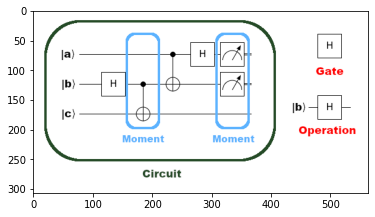

In [ ]:
img = mpimg.imread('/home/theone/other_models/Quantum/moments.png')
imgplot = plt.imshow(img)
plt.show()


The above example shows the first half of a quantum teleportation circuit, found in many quantum computation textbooks. This example uses three different gates: a Hadamard (H), controlled-Not (CNOT), and measurement. These are represented in cirq by cirq.H, cirq.CNOT, and cirq.measure, respectively.

In this example, a Hadamard is an example of a Gate object that can be applied in many different circumstances and to many different qubits. Note that the above example has two instances of an H gate but applied to different qubits. This is an example of one Gate type with two Operation instances, one applied to the qubit '|b⟩' and the other applied to qubit '|a⟩'.

Gates can generally be applied to any type of qubit (NamedQubit, LineQubit, GridQubit, etc. - see Qubits for more details) to create an Operation.

The following example shows how to construct each of these gates and operations.

In [ ]:
# This examples uses named qubits to remain abstract.
# However, we can also use LineQubits or GridQubits to specify a geometry
a = cirq.NamedQubit('a')
b = cirq.NamedQubit('b')
c = cirq.NamedQubit('c')

# Example Operations, that correspond to the moments above
print(cirq.H(b))
print(cirq.CNOT(b, c))
print(cirq.CNOT(a, b))
print(cirq.H(a))
print(cirq.measure(a,b))


H(b)
CNOT(b, c)
CNOT(a, b)
H(a)
cirq.MeasurementGate(2, cirq.MeasurementKey(name='a,b'), ())(a, b)


This would create the operations needed to comprise the circuit from the above diagram. The next step would be composing these operations into moments and circuits. For more on those types, see the documentation on Circuits.
Immutability of Gates and Operations

Gates and Operations in Cirq are considered to be immutable objects. This means that a cirq.Gate or cirq.Operation should not be modified after its creation. If attributes of these objects need to be modified, a new object should be created.

Modifying these objects in-place could cause unexpected behavior. For instance, changing the qubits of an existing cirq.Operation object could cause an existing cirq.Moment that contains this object to have operations with overlapping qubits.
Other gate features

Most Gates operate on a specific number of qubits, which can be accessed by the num_qubits() function. One notable exception is the MeasurementGate which can be applied to a variable number of qubits.

Most gates also have a unitary matrix representation, which can be accessed by cirq.unitary(gate).

Not all Gates correspond to unitary evolution. They may represent a probabilistic mixture of unitaries, or a general quantum channel. The component unitaries and associated probabilities of a mixture can be accessed by cirq.mixture(gate). The Kraus operator representation of a channel can be accessed by cirq.kraus(gate). Non-unitary gates are often used in the simulation of noise. See noise documentation for more details.

Many arithmetic operators will work in the expected way when applied to gates. For instance, cirq.X**0.5 represents a square root of X gate. These can also be applied to Operators for a more compact representation, such as cirq.X(q1)**0.5 will be a square root of X gate applied to the q1 qubit. This functionality depends on the "magic methods" of the gate being defined (see below for details).

Gates can be converted to a controlled version by using Gate.controlled(). In general, this returns an instance of a ControlledGate. However, for certain special cases where the controlled version of the gate is also a known gate, this returns the instance of that gate. For instance, cirq.X.controlled() returns a cirq.CNOT gate. Operations have similar functionality Operation.controlled_by(), such as cirq.X(q0).controlled_by(q1).
Common gates

Cirq supports a number of gates natively, with the opportunity to extend these gates for more advanced use cases.
Measurement gate

cirq.MeasurementGate This is a measurement in the computational basis. This gate can be applied to a variable number of qubits. The function cirq.measure(q0, q1, ...) can also be used as a short-hand to create a MeasurementGate .
Single qubit gates

Most single-qubit gates can be thought of as rotation around an axis in the Bloch Sphere representation and are usually referred to by their axis of rotation. Some operators use the notation of a 'half-turn' which is defined as a 180 degree (pi radians) rotation around the axis.

cirq.X / cirq.Y / cirq.Z The Pauli gates X, Y, and Z which rotate the state around the associated axis by one half-turn.

cirq.rx(rads) A rotation about the Pauli 'X' axis in terms of radians. This is equivalent to exp(-i X rads / 2) = cos(rads/2) I - i sin(rads/2) X

cirq.ry(rads) A rotation about the Pauli 'Y' axis in terms of radians. This is equivalent to exp(-i Y rads / 2) = cos(rads/2) I - i sin(rads/2) Y

cirq.rz(rads) A rotation about the Pauli 'Z' axis in terms of radians. This is equivalent to exp(-i Z rads / 2) = cos(rads/2) I - i sin(rads/2) Z

cirq.XPowGate(exponent=t) Rotations about the Pauli X axis, equivalent to cirq.X**t. See cirq.XPowGate for its unitary matrix. Note that this has a global phase of e^{i·π·t/2} versus the traditionally defined rotation matrix, which can be modified by the optional parameter global_shift.

cirq.YPowGate(exponent=t) Rotations about the Pauli Y axis, equivalent to cirq.Y**t. See cirq.YPowGate for its unitary matrix. Note that this has a global phase of e^{i·π·t/2} versus the traditionally defined rotation matrix, which can be modified by the optional parameter global_shift.

cirq.ZPowGate(exponent=t) Rotations about the Pauli Z axis, equivalent to cirq.Z**t. See cirq.ZPowGate for its unitary matrix. Note that this has a global phase of e^{i·π·t/2} versus the traditionally defined rotation matrix, which can be modified by the optional parameter global_shift.

cirq.PhasedXPowGate This gate is a rotation about an axis in the XY plane of the Bloch sphere. The PhasedXPowGate takes two parameters, exponent and phase_exponent. The gate is equivalent to the circuit ───Z^-p───X^t───Z^p─── where p is the phase_exponent and t is the exponent.

cirq.PhasedXZGate This gate is like a cirq.PhasedXPowGate above, but it also includes an extra phase about the z axis. PhasedXZGate takes three parameters, x_exponent, z_exponent, and axis_phase_exponent. The gate is equivalent to the circuit ───Z^(-a)──X^x──Z^a────Z^z─── where x is the x_exponent, z is the z_exponent, and a is the axis_phase_exponent.

cirq.H / cirq.HPowGate The Hadamard gate is a rotation around the X+Z axis. cirq.HPowGate(exponent=t) is a variable rotation of t turns around this axis. cirq.H is a π rotation and is equivalent to cirq.HPowGate(exponent=1)

S The square root of Z gate, equivalent to cirq.Z**0.5

T The fourth root of Z gate, equivalent to cirq.Z**0.25.
Two qubit gates

cirq.CZ / cirq.CZPowGate The controlled-Z gate. A two qubit gate that phases the |11⟩ state. cirq.CZPowGate(exponent=t) is equivalent to cirq.CZ**t and has a matrix representation of exp(i pi |11⟩⟨11| t).

cirq.CNOT / cirq.CNotPowGate The controlled-X gate. This gate swaps the |11⟩ and |10⟩ states. cirq.CNotPowGate(exponent=t) is equivalent to cirq.CNOT**t .

cirq.SWAP / cirq.SwapPowGate The swap gate swaps the |01⟩ and |10⟩ states. cirq.SWAP**t is the same as cirq.SwapPowGate(exponent = t)

cirq.ISWAP / cirq.ISwapPowGate The iSwap gate swaps the |01⟩ and |10⟩ states and adds a relative phase of i. cirq.ISWAP**t is the same as cirq.ISwapPowGate(exponent = t)

Parity gates: The gates cirq.XX, cirq.YY, and cirq.ZZ are equivalent to performing the equivalent one-qubit Pauli gates on both qubits. The gates cirq.XXPowGate, cirq.YYPowGate, and cirq.ZZPowGate are the powers of these gates.
Other gates

cirq.MatrixGate: A gate defined by its unitary matrix in the form of a numpy ndarray.

cirq.WaitGate: This gate does nothing for a specified cirq.Duration amount of time. This is useful for conducting T1 and T2 decay experiments.

cirq.CCNOT, cirq.CCX, cirq.TOFFOLI, cirq.CCXPowGate: Three qubit gates representing a controlled-controlled-X gate and powers of this gate.

cirq.CCZ, cirq.CCZPowGate: Three qubit gates representing a controlled-controlled-Z gate and power of this gate.

CSWAP, CSwapGate, FREDKIN: Three qubit gates representing a controlled-SWAP gate.

TwoQubitDiagonalGate, ThreeQubitDiagonalGate: Two and three qubit gates which are diagonal in the computational basis.

QubitPermutationGate A gate that permutes a given set of qubits.
Advanced: create your own gates
If the above gates are not sufficient for your use case, it is fairly simple to create your own gate. In order to do so, you can define your class and inherit the cirq.Gate class and define the functionality in your class. For more information, see this guide.

# Custom gates


 Gates are classes in Cirq. To define custom gates, we inherit from a base gate class and define a few methods.

The general pattern is to:

    Inherit from cirq.Gate.
    Define one of the _num_qubits_ or _qid_shape_ methods.
    Define one of the _unitary_ or _decompose_ method
    

In [ ]:
"""Define a custom single-qubit gate."""
import numpy as np
class MyGate(cirq.Gate):
    def __init__(self):
        super(MyGate, self)

    def _num_qubits_(self):
        return 1

    def _unitary_(self):
        return np.array([
            [1.0,  1.0],
            [-1.0, 1.0]
        ]) / np.sqrt(2)

    def _circuit_diagram_info_(self, args):
        return "G"

my_gate = MyGate()


In [ ]:
"""Use the custom gate in a circuit."""
circ = cirq.Circuit(
    my_gate.on(cirq.LineQubit(0))
)

print("Circuit with custom gates:")
print(circ)


Circuit with custom gates:
0: ───G───


In [ ]:
"""Simulate a circuit with a custom gate."""
sim = cirq.Simulator()

res = sim.simulate(circ)
print(res)


measurements: (no measurements)

qubits: (cirq.LineQubit(0),)
output vector: 0.707|0⟩ - 0.707|1⟩

phase:
output vector: |⟩


In [ ]:
"""Define a custom two-qubit gate."""
class AnotherGate(cirq.Gate):
    def __init__(self):
        super(AnotherGate, self)

    def _num_qubits_(self):
        return 2

    def _unitary_(self):
        return np.array([
            [1.0, -1.0, 0.0,  0.0],
            [0.0,  0.0, 1.0,  1.0],
            [1.0,  1.0, 0.0,  0.0],
            [0.0,  0.0, 1.0, -1.0]
        ]) / np.sqrt(2)

    def _circuit_diagram_info_(self, args):
        return "Top wire symbol", "Bottom wire symbol"

this_gate = AnotherGate()

"""Use the custom two-qubit gate in a circuit."""
circ = cirq.Circuit(
    this_gate.on(*cirq.LineQubit.range(2))
)

print("Circuit with custom two-qubit gate:")
print(circ)


Circuit with custom two-qubit gate:
0: ───Top wire symbol──────
      │
1: ───Bottom wire symbol───


From a known decomposition

Custom gates can also be defined from a known decomposition (of gates). This is useful, for example, when groups of gates appear repeatedly in a circuit, or when a standard decomposition of a gate into primitive gates is known.

We show an example below of a custom swap gate defined from a known decomposition of three CNOT gates.

The _decompose_ method yields the operations which implement the custom gate. (One can also return a list of operations instead of a generator.)

When we use this gate in a circuit, the individual gates in the decomposition do not appear in the circuit. Instead, the _circuit_diagram_info_ appears in the circuit. As mentioned, this can be useful for interpreting circuits at a higher level than individual (primitive) gates.

In [ ]:
class MySwap(cirq.Gate):
    def __init__(self):
        super(MySwap, self)

    def _num_qubits_(self):
        return 2

    def _decompose_(self, qubits):
        a, b = qubits
        yield cirq.CNOT(a, b)
        yield cirq.CNOT(b, a)
        yield cirq.CNOT(a, b)

    def _circuit_diagram_info_(self, args):
        return ["CustomSWAP"] * self.num_qubits()

my_swap = MySwap()

"""Use the custom gate in a circuit."""
qreg = cirq.LineQubit.range(2)
circ = cirq.Circuit(
    cirq.X(qreg[0]),
    my_swap.on(*qreg)
)

print("Circuit:")
print(circ)


Circuit:
0: ───X───CustomSWAP───
          │
1: ───────CustomSWAP───


In [ ]:
"""Simulate the circuit."""
sim.simulate(circ)


measurements: (no measurements)

qubits: (cirq.LineQubit(0), cirq.LineQubit(1))
output vector: |01⟩

phase:
output vector: |⟩

More on magic methods and protocols

As mentioned, methods such as _unitary_ which we have seen are known as "magic methods." Much of Cirq relies on "magic methods", which are methods prefixed with one or two underscores and used by Cirq's protocols or built-in Python methods. For instance, Python translates cirq.Z**0.25 into cirq.Z.__pow__(0.25). Other uses are specific to cirq and are found in the protocols subdirectory. They are defined below.

At minimum, you will need to define either the _num_qubits_ or _qid_shape_ magic method to define the number of qubits (or qudits) used in the gate.
Standard Python magic methods

There are many standard magic methods in Python. Here are a few of the most important ones used in Cirq:

    __str__ for user-friendly string output and __repr__ is the Python-friendly string output, meaning that eval(repr(y))==y should always be true.
    __eq__ and __hash__ which define whether objects are equal or not. You can also use cirq.value.value_equality for objects that have a small list of sub-values that can be compared for equality.
    Arithmetic functions such as __pow__, __mul__, __add__ define the action of **, *, and + respectively.

cirq.num_qubits and def _num_qubits_

A Gate must implement the _num_qubits_ (or _qid_shape_) method. This method returns an integer and is used by cirq.num_qubits to determine how many qubits this gate operates on.
cirq.qid_shape and def _qid_shape_

A qudit gate or operation must implement the _qid_shape_ method that returns a tuple of integers. This method is used to determine how many qudits the gate or operation operates on and what dimension each qudit must be. If only the _num_qubits_ method is implemented, the object is assumed to operate only on qubits. Callers can query the qid shape of the object by calling cirq.qid_shape on it. See qudit documentation for more information.
cirq.unitary and def _unitary_

When an object can be described by a unitary matrix, it can expose that unitary matrix by implementing a _unitary_(self) -> np.ndarray method. Callers can query whether or not an object has a unitary matrix by calling cirq.unitary on it. The _unitary_ method may also return NotImplemented, in which case cirq.unitary behaves as if the method is not implemented.
cirq.decompose and def _decompose_

Operations and gates can be defined in terms of other operations by implementing a _decompose_ method that returns those other operations. Operations implement _decompose_(self) whereas gates implement _decompose_(self, qubits) (since gates don't know their qubits ahead of time).

The main requirements on the output of _decompose_ methods are:

    DO NOT CREATE CYCLES. The cirq.decompose method will iterative decompose until it finds values satisfying a keep predicate. Cycles cause it to enter an infinite loop.
    Head towards operations defined by Cirq, because these operations have good decomposition methods that terminate in single-qubit and two qubit gates. These gates can be understood by the simulator, optimizers, and other code.
    All that matters is functional equivalence. Don't worry about staying within or reaching a particular gate set; it's too hard to predict what the caller will want. Gate-set-aware decomposition is useful, but this is not the protocol that does that. Instead, use features available in the transformer API.

For example, cirq.CCZ decomposes into a series of cirq.CNOT and cirq.T operations. This allows code that doesn't understand three-qubit operation to work with cirq.CCZ; by decomposing it into operations they do understand. As another example, cirq.TOFFOLI decomposes into a cirq.H followed by a cirq.CCZ followed by a cirq.H. Although the output contains a three qubit operation (the CCZ), that operation can be decomposed into two qubit and one qubit operations. So code that doesn't understand three qubit operations can deal with Toffolis by decomposing them, and then decomposing the CCZs that result from the initial decomposition.

In general, decomposition-aware code consuming operations is expected to recursively decompose unknown operations until the code either hits operations it understands or hits a dead end where no more decomposition is possible. The cirq.decompose method implements logic for performing exactly this kind of recursive decomposition. Callers specify a keep predicate, and optionally specify intercepting and fallback decomposers, and then cirq.decompose will repeatedly decompose whatever operations it was given until the operations satisfy the given keep. If cirq.decompose hits a dead end, it raises an error.

Cirq doesn't make any guarantees about the "target gate set" decomposition is heading towards. cirq.decompose is not a method Decompositions within Cirq happen to converge towards X, Y, Z, CZ, PhasedX, specified-matrix gates, and others. But this set will vary from release to release, and so it is important for consumers of decompositions to look for generic properties of gates, such as "two qubit gate with a unitary matrix", instead of specific gate types such as CZ gates.
cirq.inverse and __pow__

Gates and operations are considered to be invertible when they implement a __pow__ method that returns a result besides NotImplemented for an exponent of -1. This inverse can be accessed either directly as value**-1, or via the utility method cirq.inverse(value). If you are sure that value has an inverse, saying value**-1 is more convenient than saying cirq.inverse(value). cirq.inverse is for cases where you aren't sure if value is invertible, or where value might be a sequence of invertible operations.

cirq.inverse has a default parameter used as a fallback when value isn't invertible. For example, cirq.inverse(value, default=None) returns the inverse of value, or else returns None if value isn't invertible. (If no default is specified and value isn't invertible, a TypeError is raised.)

When you give cirq.inverse a list, or any other kind of iterable thing, it will return a sequence of operations that (if run in order) undoes the operations of the original sequence (if run in order). Basically, the items of the list are individually inverted and returned in reverse order. For example, the expression cirq.inverse([cirq.S(b), cirq.CNOT(a, b)]) will return the tuple (cirq.CNOT(a, b), cirq.S(b)**-1).

Gates and operations can also return values beside NotImplemented from their __pow__ method for exponents besides -1. This pattern is used often by Cirq. For example, the square root of X gate can be created by raising cirq.X to 0.5:

In [ ]:
print(cirq.unitary(cirq.X))


[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [ ]:
sqrt_x = cirq.X**0.5
print(cirq.unitary(sqrt_x))


[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]


The Pauli gates included in Cirq use the convention Z**0.5 ≡ S ≡ np.diag(1, i), Z**-0.5 ≡ S**-1, X**0.5 ≡ H·S·H, and the square root of Y is inferred via the right hand rule.
_circuit_diagram_info_(self, args) and cirq.circuit_diagram_info(val, [args], [default])

Circuit diagrams are useful for visualizing the structure of a Circuit. Gates can specify compact representations to use in diagrams by implementing a _circuit_diagram_info_ method. For example, this is why SWAP gates are shown as linked '×' characters in diagrams.

The _circuit_diagram_info_ method takes an args parameter of type cirq.CircuitDiagramInfoArgs and returns either a string (typically the gate's name), a sequence of strings (a label to use on each qubit targeted by the gate), or an instance of cirq.CircuitDiagramInfo (which can specify more advanced properties such as exponents and will expand in the future).

You can query the circuit diagram info of a value by passing it into cirq.circuit_diagram_info.

# Import/export circuits


 Cirq has several features that allow the user to import/export from other quantum languages.
Exporting and importing to JSON

For storing circuits or for transfering them between collaborators, JSON can be a good choice. Many objects in cirq can be serialized as JSON and then stored as a text file for transfer, storage, or for posterity.

Any object that can be serialized, which includes circuits, moments, gates, operations, and many other cirq constructs, can be turned into JSON with the protocol cirq.to_json(obj). This will return a string that contains the serialized JSON.

To take JSON and turn it back into a cirq object, the protocol cirq.read_json can be used. This can take a python file or string filename as the first argument (file_or_fn) or can take a named json_text parameter to accept a string input.

The following shows how to serialize and de-serialize a circuit.

https://quantumai.google/cirq/build/interop

In [ ]:
import cirq

# Example circuit
circuit = cirq.Circuit(cirq.Z(cirq.GridQubit(1,1)))

# Serialize to a JSON string
json_string = cirq.to_json(circuit)
print('JSON string:')
print(json_string)
print()

# Now, read back the string into a cirq object
# cirq.read_json can also read from a file
new_circuit = cirq.read_json(json_text=json_string)

print(f'Deserialized object of type: {type(new_circuit)}:')
print(new_circuit)


JSON string:
{
  "cirq_type": "Circuit",
  "moments": [
    {
      "cirq_type": "Moment",
      "operations": [
        {
          "cirq_type": "SingleQubitPauliStringGateOperation",
          "pauli": {
            "cirq_type": "_PauliZ",
            "exponent": 1.0,
            "global_shift": 0.0
          },
          "qubit": {
            "cirq_type": "GridQubit",
            "row": 1,
            "col": 1
          }
        }
      ]
    }
  ]
}

Deserialized object of type: <class 'cirq.circuits.circuit.Circuit'>:
(1, 1): ───Z───


# Operators and observables

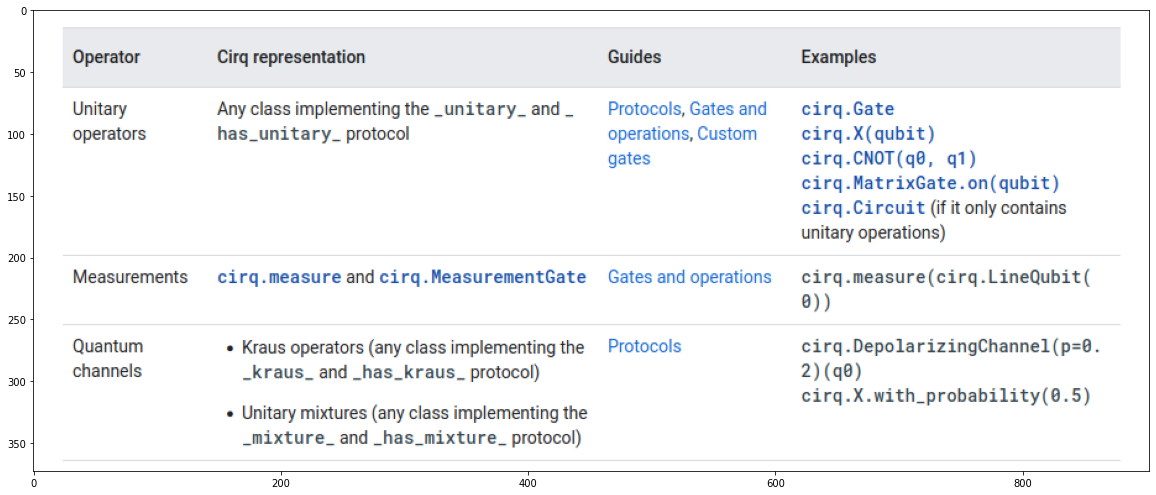

In [ ]:
img = mpimg.imread('/home/theone/other_models/Quantum/oper.png')
plt.figure(figsize = (20,12))
imgplot = plt.imshow(img)
plt.show()


# Operators

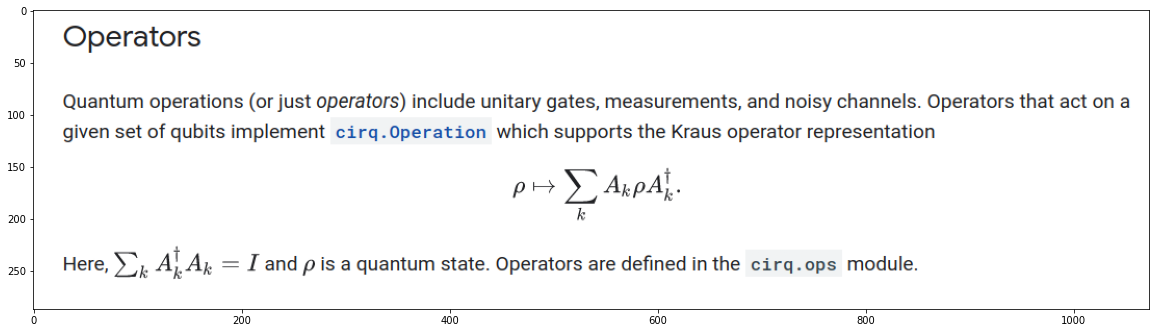

In [ ]:
img = mpimg.imread('/home/theone/other_models/Quantum/operators.png')
plt.figure(figsize = (20,12))
imgplot = plt.imshow(img)
plt.show()


Unitary operators
Standard unitary operators used in quantum information can be found in cirq.ops, for example Pauli- as shown below.

In [ ]:
qubit = cirq.LineQubit(0)
unitary_operation = cirq.ops.X.on(qubit)  # cirq.X can also be used for cirq.ops.X
print(unitary_operation)


X(q(0))


Cirq makes a distinction between gates (independent of qubits) and operations (gates acting on qubits). Thus cirq.X is a gate where cirq.X.on(qubit) is an operation. See the guide on gates for more details and additional common unitaries defined in Cirq.

    Note: The method cirq.X.on_each is a utility to apply cirq.X to multiple qubits. Similarly for other operations.

Every cirq.Operation supports the cirq.channel protocol which returns its Kraus operators. (Read more about protocols in Cirq.)

In [ ]:
kraus_ops = cirq.kraus(unitary_operation)
print(f"Kraus operators of {unitary_operation.gate} are:", *kraus_ops, sep="\n")


Kraus operators of X are:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [ ]:
unitary = cirq.unitary(cirq.ops.X)
print(f"Unitary of {unitary_operation.gate} is:\n", unitary)


Unitary of X is:
 [[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


In [ ]:
sqrt_not = cirq.X ** (1 / 2)
print(cirq.unitary(sqrt_not))


[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]


Any gate can be controlled via cirq.ControlledGate as follows.

In [ ]:
controlled_hadamard = cirq.ControlledGate(sub_gate=cirq.H, num_controls=1)
print(cirq.unitary(controlled_hadamard).round(3))


[[ 1.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  1.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j]]


Measurements
Cirq supports measurements in the computational basis.

In [ ]:
measurement = cirq.MeasurementGate(num_qubits=1, key="key")
print("Measurement:", measurement)


Measurement: cirq.MeasurementGate(1, cirq.MeasurementKey(name='key'), ())


The key can be used to identify results of measurements when simulating circuits. A measurement gate acting on a qubit forms an operation.

In [ ]:
measurement_operation = measurement.on(qubit)
print(measurement_operation)


cirq.MeasurementGate(1, cirq.MeasurementKey(name='key'), ())(q(0))



    Note: The function cirq.measure is a utility to measure a single qubit, and the function cirq.measure_each is a utility to measure multiple qubits.

Again measurement operations implement cirq.Operation so the cirq.channel protocol can be used to get the Kraus operators.

In [ ]:
kraus_ops = cirq.kraus(measurement)
print(f"Kraus operators of {measurement} are:", *kraus_ops, sep="\n\n")


Kraus operators of cirq.MeasurementGate(1, cirq.MeasurementKey(name='key'), ()) are:

[[1. 0.]
 [0. 0.]]

[[0. 0.]
 [0. 1.]]


The functions cirq.measure_state_vector and cirq.measure_density_matrix can be used to perform computational basis measurements on state vectors and density matrices, respectively, represented by NumPy arrays.

In [ ]:
psi = np.ones(shape=(2,)) / np.sqrt(2)
print("Wavefunction:\n", psi.round(3))


Wavefunction:
 [0.707 0.707]


In [ ]:
results, psi_prime = cirq.measure_state_vector(psi, indices=[0])

print("Measured:", results[0])
print("Resultant state:\n", psi_prime)


Measured: 0
Resultant state:
 [1. 0.]


In [ ]:
rho = np.ones(shape=(2, 2)) / 2.0

measurements, rho_prime = cirq.measure_density_matrix(rho, indices=[0])

print("Measured:", measurements[0])
print("Resultant state:\n", rho_prime)


Measured: 0
Resultant state:
 [[1. 0.]
 [0. 0.]]


Noisy channels
Like common unitary gates, Cirq defines many common noisy channels, for example the depolarizing channel below.

In [ ]:
depo_channel = cirq.DepolarizingChannel(p=0.01, n_qubits=1)
print(depo_channel)


depolarize(p=0.01)


Just like unitary gates and measurements, noisy channels implement cirq.Operation, and we can always use cirq.channel to get the Kraus operators.

In [ ]:
kraus_ops = cirq.kraus(depo_channel)
print(f"Kraus operators of {depo_channel} are:", *[op.round(2) for op in kraus_ops], sep="\n\n")


Kraus operators of depolarize(p=0.01) are:

[[0.99 0.  ]
 [0.   0.99]]

[[0.  +0.j 0.06+0.j]
 [0.06+0.j 0.  +0.j]]

[[0.+0.j   0.-0.06j]
 [0.+0.06j 0.+0.j  ]]

[[ 0.06+0.j  0.  +0.j]
 [ 0.  +0.j -0.06+0.j]]


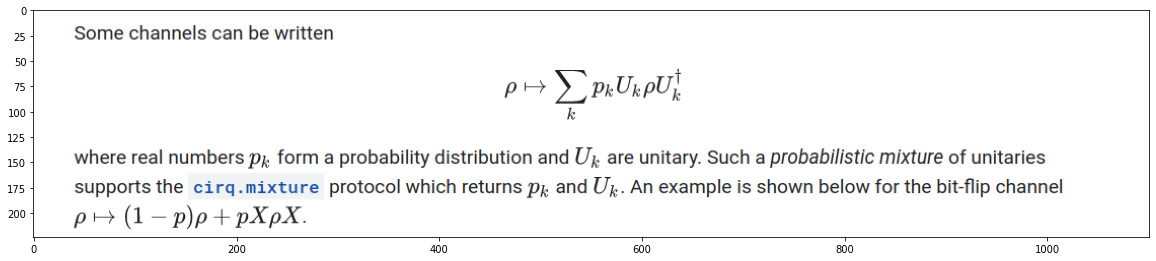

In [ ]:
img = mpimg.imread('/home/theone/other_models/Quantum/prob.png')
plt.figure(figsize = (20,12))
imgplot = plt.imshow(img)
plt.show()


In [ ]:
bit_flip = cirq.bit_flip(p=0.05)
probs, unitaries = cirq.mixture(bit_flip)

for prob, unitary in cirq.mixture(bit_flip):
    print(f"With probability {prob}, apply \n{unitary}\n")


With probability 0.95, apply 
[[1. 0.]
 [0. 1.]]

With probability 0.05, apply 
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]



In circuits
Any cirq.Operation (pre-defined or user-defined) can be placed in a cirq.Circuit. An example with a unitary, noisy channel, and measurement is shown below.

In [ ]:
circuit = cirq.Circuit(
    cirq.H(qubit),
    cirq.depolarize(p=0.01).on(qubit),
    cirq.measure(qubit)
)
print(circuit)


0: ───H───D(0.01)───M───


The general input to the circuit constructor is a cirq.OP_TREE, i.e., an operation or nested collection of operations. Circuits can be manipulated as described in the circuits guide and simulated as described in the simulation guide.
Alternate representations
In addition to the above representations for operators. Cirq also supports some more non-standard representations as well. To convert a set of kraus operators to a choi representation you can do:

In [ ]:
depo_channel = cirq.DepolarizingChannel(p=0.01, n_qubits=1)
kraus_rep = cirq.kraus(depo_channel)
print(kraus_rep)

(array([[0.99498744, 0.        ],
       [0.        , 0.99498744]]), array([[0.        +0.j, 0.05773503+0.j],
       [0.05773503+0.j, 0.        +0.j]]), array([[0.+0.j        , 0.-0.05773503j],
       [0.+0.05773503j, 0.+0.j        ]]), array([[ 0.05773503+0.j,  0.        +0.j],
       [ 0.        +0.j, -0.05773503+0.j]]))


In [ ]:
choi_rep = cirq.kraus_to_choi(kraus_rep)
print(choi_rep)


[[0.99333333+0.j 0.        +0.j 0.        +0.j 0.98666667+0.j]
 [0.        +0.j 0.00666667+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.00666667+0.j 0.        +0.j]
 [0.98666667+0.j 0.        +0.j 0.        +0.j 0.99333333+0.j]]


And to get the superoperator representation you can do:

In [ ]:
super_rep = cirq.kraus_to_superoperator(kraus_rep)
print(super_rep)


[[0.99333333+0.j 0.        +0.j 0.        +0.j 0.00666667+0.j]
 [0.        +0.j 0.98666667+0.j 0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.98666667+0.j 0.        +0.j]
 [0.00666667+0.j 0.        +0.j 0.        +0.j 0.99333333+0.j]]


 Research libraries and tools 

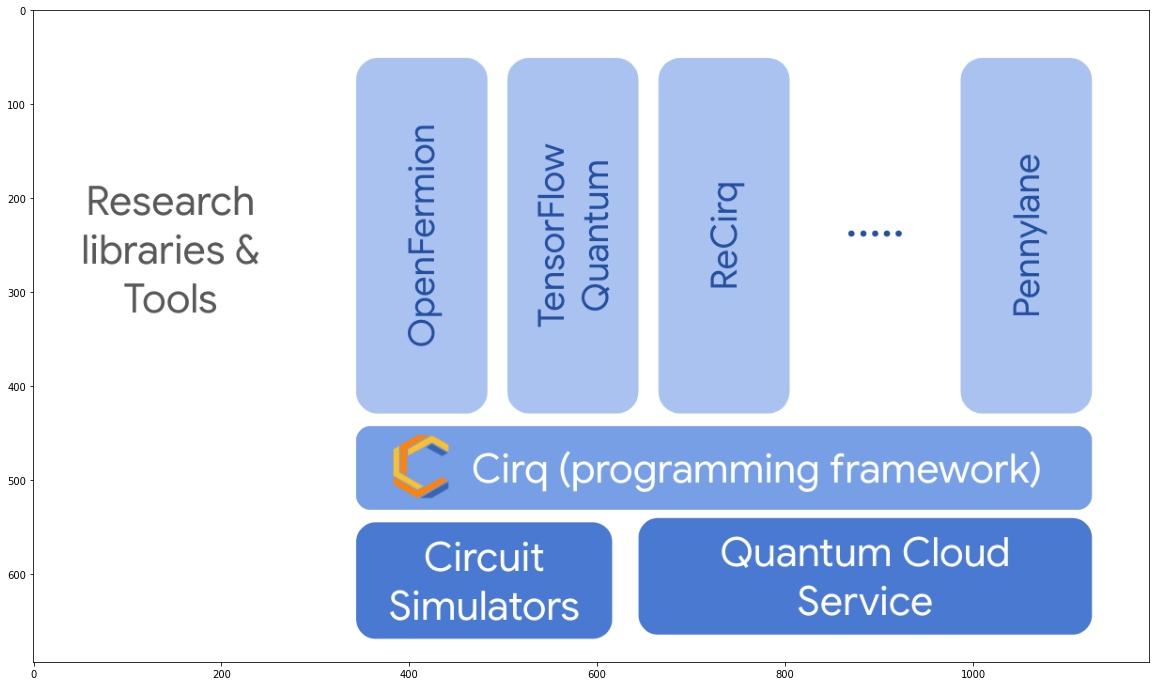

In [ ]:
img = mpimg.imread('/home/theone/other_models/Quantum/tools.png')
plt.figure(figsize = (20,12))
imgplot = plt.imshow(img)
plt.show()

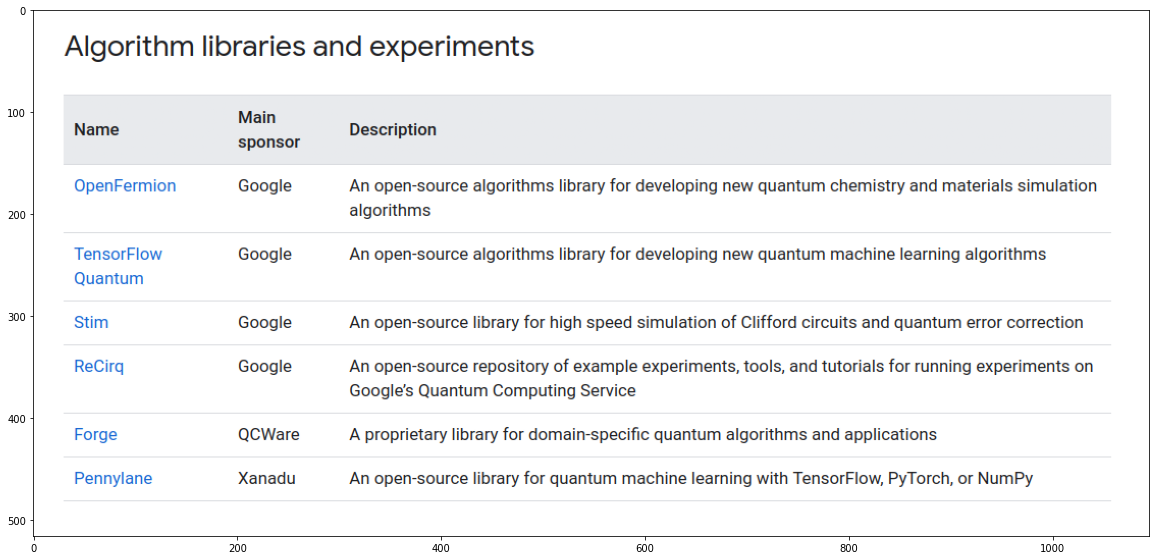

In [ ]:
img = mpimg.imread('/home/theone/other_models/Quantum/ml.png')
plt.figure(figsize = (20,12))
imgplot = plt.imshow(img)
plt.show()

https://www.tensorflow.org/quantum

https://arxiv.org/abs/2003.02989

https://pennylane.ai/


Colab Notebook Tensorflow:

https://www.tensorflow.org/quantum/tutorials/hello_many_worlds

# Simulation

Introduction to pure state simulation
Here is a simple circuit:

In [ ]:
q0 = cirq.GridQubit(0, 0)
q1 = cirq.GridQubit(1, 0)


def basic_circuit(meas=True):
    sqrt_x = cirq.X**0.5
    yield sqrt_x(q0), sqrt_x(q1)
    yield cirq.CZ(q0, q1)
    yield sqrt_x(q0), sqrt_x(q1)
    if meas:
        yield cirq.measure(q0, key='q0'), cirq.measure(q1, key='q1')


circuit = cirq.Circuit()
circuit.append(basic_circuit())

print(circuit)


(0, 0): ───X^0.5───@───X^0.5───M('q0')───
                   │
(1, 0): ───X^0.5───@───X^0.5───M('q1')───


In [ ]:
simulator = cirq.Simulator()
result = simulator.run(circuit)

print(result)


q0=0
q1=0


In [ ]:
result = simulator.run(circuit)
print(result)


q0=0
q1=1


Accessing the state vector
To access the full state vector, the simulate() methods (simulate(), simulate_sweep(), simulate_moment_steps()) can be used instead. This behavior is only possible in simulation, but can be useful for debugging a circuit:

simulate() returns a SimulationTrialResult containing the final state, as seen above. The built-in Cirq simulator returns a StateVectorTrialResult , which includes a number of utilities for analyzing the final state vector.

Note that the simulator uses numpy's float32 precision (which is complex64 for complex numbers) by default, but that the simulator can take in a dtype of np.complex128 if higher precision is needed.


In [ ]:
import numpy as np

circuit = cirq.Circuit()
circuit.append(basic_circuit(False))
result = simulator.simulate(circuit, qubit_order=[q0, q1])

print(np.around(result.final_state_vector, 3))


[0.5+0.j  0. +0.5j 0. +0.5j 0.5+0.j ]


Expectation values
For applications that measure expectation values of observables, the simulate_expectation_values() method provides a simple interface for returning just the desired expectation values. This can be more efficient than returning the entire state vector, particularly when handling multiple results at once, or when using an external simulator.

In [ ]:
XX_obs = cirq.X(q0) * cirq.X(q1)
ZZ_obs = cirq.Z(q0) * cirq.Z(q1)
ev_list = simulator.simulate_expectation_values(
    cirq.Circuit(basic_circuit(False)), observables=[XX_obs, ZZ_obs]
)
print(ev_list)

[(1+0j), 0j]


# Qubit and Amplitude Ordering



The qubit_order argument to the simulator's run() method determines the ordering of some results, such as the amplitudes in the final wave function. The qubit_order argument is optional: when it is omitted, qubits are ordered ascending by their name (i.e., what str(qubit) returns).

The simplest qubit_order value you can provide is a list of the qubits in the desired order. Any qubits from the circuit that are not in the list will be ordered using the default str(qubit) ordering, but come after qubits that are in the list. Be aware that all qubits in the list are included in the simulation, even if they are not operated on by the circuit.

The mapping from the order of the qubits to the order of the amplitudes in the wave function can be tricky to understand. Basically, it is the same as the ordering used by numpy.kron.

More concretely, the k'th amplitude in the wave function will correspond to the k'th case that would be encountered when nesting loops over the possible values of each qubit.

The first qubit's computational basis values are looped over in the outermost loop, the last qubit's computational basis values are looped over in the inner-most loop, etc.:

In [ ]:
i = 0
for first in [0, 1]:
    for second in [0, 1]:
        print('amps[{}] is for first={}, second={}'.format(i, first, second))
        i += 1


amps[0] is for first=0, second=0
amps[1] is for first=0, second=1
amps[2] is for first=1, second=0
amps[3] is for first=1, second=1


You can check that this is in fact the ordering with a circuit that flips one qubit out of two:

In [ ]:
q_stay = cirq.NamedQubit('q_stay')
q_flip = cirq.NamedQubit('q_flip')
c = cirq.Circuit(cirq.X(q_flip))

# first qubit in order flipped
result = simulator.simulate(c, qubit_order=[q_flip, q_stay])
print(abs(result.final_state_vector).round(3))


[0. 0. 1. 0.]


In [ ]:
# second qubit in order flipped
result = simulator.simulate(c, qubit_order=[q_stay, q_flip])
print(abs(result.final_state_vector).round(3))


[0. 1. 0. 0.]


Stepping through a circuit

When debugging, it is useful to not just see the end result of a circuit, but to inspect the state of the system at different steps in the circuit.

To support this, Cirq provides a method to return an iterator over a Moment by Moment simulation. This method is named simulate_moment_steps:

The object returned by the moment_steps iterator is a StepResult. This object has the state along with any measurements that occurred before or during that step.

In [ ]:
circuit = cirq.Circuit()
circuit.append(basic_circuit())
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    print('state at step %d: %s' % (i, np.around(step.state_vector(copy=True), 3)))


Parameterized values and studies

In addition to circuit gates with fixed values, Cirq also supports gates which can have Symbol values (see Gates). These are values that can be resolved at runtime.

For simulators, these values are resolved by providing a cirq.ParamResolver. A cirq.ParamResolver provides a map from the Symbol's name to its assigned value.

In [ ]:
import sympy

rot_w_gate = cirq.X ** sympy.Symbol('x')
circuit = cirq.Circuit()
circuit.append([rot_w_gate(q0), rot_w_gate(q1)])
print(circuit)
for y in range(5):
    resolver = cirq.ParamResolver({'x': y / 4.0})
    result = simulator.simulate(circuit, resolver)
    print(f"params:{result.params}, state vector:{np.round(result.final_state_vector, 2)}")


In the previous example, the symbol x is used in two gates, and then the resolver provides this value at run time.

Parameterized values are most useful in defining what is called a "sweep", which is a sequence of trials, where each trial is a run with a particular set of parameter values.

Running a sweep returns a Result for each set of fixed parameter values and repetitions.

For instance:

In [ ]:
resolvers = [cirq.ParamResolver({'x': y / 2.0}) for y in range(3)]
circuit = cirq.Circuit()
circuit.append([rot_w_gate(q0), rot_w_gate(q1)])
circuit.append([cirq.measure(q0, key='q0'), cirq.measure(q1, key='q1')])
results = simulator.run_sweep(program=circuit, params=resolvers, repetitions=2)
for result in results:
    print(f"params:{result.params}")
    print(f"measurements:")
    print(result)


# Mixed state simulations



In addition to pure state simulation, Cirq also supports simulation of mixed states.

Even though this simulator is not as efficient as the pure state simulators, they allow for a larger class of noisy circuits to be run as well as keeping track of the simulation's density matrix. This fact can allow for more exact simulations: the density matrix can represent all possible results of a noisy circuit, while the pure-state simulator can only sample from these results.

Mixed state simulation is supported by the cirq.DensityMatrixSimulator class.

Here is a simple example of simulating a channel using the mixed state simulator:

In [ ]:
q = cirq.NamedQubit('a')
circuit = cirq.Circuit(cirq.H(q), cirq.amplitude_damp(0.2)(q), cirq.measure(q))
simulator = cirq.DensityMatrixSimulator()
result = simulator.run(circuit, repetitions=100)
print(result.histogram(key='a'))

The previous example creates a state in an equal superposition of 0 and 1, then applies amplitude damping which takes 1 to 0 with something like a probability of 0.2.

You can see that, instead of about 50 percent of the timing being in 0, about 20 percent of the 1 has been converted into 0, so you end up with total around 60 percent in the 0 state.

Like the pure state simulators, the mixed state simulator supports run() and run_sweeps() methods.

The cirq.DensityMatrixSimulator also supports getting access to the density matrix of the circuit at the end of simulating the circuit, or when stepping through the circuit. These are done by the simulate() and simulate_sweep() methods, or, for stepping through the circuit, via the simulate_moment_steps method. For example, you can simulate creating an equal superposition followed by an amplitude damping channel with a gamma of 0.2 by:

In [ ]:
q = cirq.NamedQubit('a')
circuit = cirq.Circuit(cirq.H(q), cirq.amplitude_damp(0.2)(q))
simulator = cirq.DensityMatrixSimulator()
result = simulator.simulate(circuit)
print(np.around(result.final_density_matrix, 3))

[[0.6  +0.j 0.447+0.j]
 [0.447+0.j 0.4  +0.j]]


# Histograms

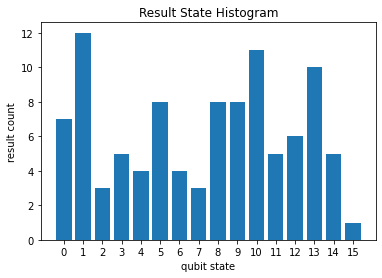

In [ ]:
q = cirq.LineQubit.range(4)
circuit = cirq.Circuit([cirq.H.on_each(*q), cirq.measure(*q)])
result = cirq.Simulator().run(circuit, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()


#  Parameter Sweeps 

Concept of Circuit Parameterization and Sweeps
Suppose you have a quantum circuit and in this circuit there is a gate with some parameter. You might wish to run this circuit for different values of this parameter. An example of this type of circuit is a Rabi flop experiment. This experiment runs a set of quantum computations which 1) starts in state, 2) rotates the state by about the axis, i.e. applies the gate , and 3) measures the state in the computational basis. Running this experiment for multiple values of , and plotting the probability of observing a outcome yields the quintessential probability distribution as a function of the parameter

. To support this type of experiment, Cirq provides the concept of parameterized circuits and parameter sweeps.

The next cell illustrates parameter sweeps with a simple example. Suppose you want to compare two quantum circuits that are identical except for a single exponentiated cirq.Z gate.



In [ ]:
q0 = cirq.LineQubit(0)

circuit1 = cirq.Circuit([cirq.H(q0), cirq.Z(q0)**0.5, cirq.H(q0), cirq.measure(q0)])
print(f"circuit1:\n{circuit1}")

circuit2 = cirq.Circuit([cirq.H(q0), cirq.Z(q0)**0.25, cirq.H(q0), cirq.measure(q0)])
print(f"circuit2:\n{circuit2}")


circuit1:
0: ───H───S───H───M───
circuit2:
0: ───H───T───H───M───


You could run these circuits separately (either on hardware or in simulation), and collect statistics on the results of these circuits. However parameter sweeps can do this in a cleaner and more perfomant manner.

First define a parameter, and construct a circuit that depends on this parameter. Cirq uses SymPy, a symbolic mathematics package, to define parameters. In this example the Sympy parameter is theta, which is used to construct a parameterized circuit.

In [ ]:
import sympy

theta = sympy.Symbol("theta")

circuit = cirq.Circuit([cirq.H(q0), cirq.Z(q0)**theta, cirq.H(q0), cirq.measure(q0)])
print(f"circuit:\n{circuit}")


circuit:
0: ───H───Z^theta───H───M───


In [ ]:
cirq.is_parameterized(circuit)


True

Parameterized circuits are just like normal circuits; they just aren't defined in terms of gates that you can actually run on a quantum computer without the additional information about the values of the parameters. Following the example above, you can generate the two circuits (circuit1 and circuit2) by using cirq.resolve_parameter and supplying the values that you want the parameter(s) to take:

In [ ]:
# circuit1 has theta = 0.5
cirq.resolve_parameters(circuit, {"theta": 0.5})
# circuit2 has theta = 0.25
cirq.resolve_parameters(circuit, {"theta": 0.25})


0: ───H───T───H───M───

More interestingly, you can combine parameterized circuits with a list of parameter assignments when doing things like running circuits or simulating them. These lists of parameter assignements are called "sweeps". For example you can use a simulator's run_sweep method to run simulations for the parameters corresponding to the two circuits defined above. 

In [ ]:
sim = cirq.Simulator()
results = sim.run_sweep(circuit, repetitions=25, params=[{"theta": 0.5}, {"theta": 0.25}])
for result in results:
    print(f"param: {result.params}, result: {result}")


param: cirq.ParamResolver({'theta': 0.5}), result: q(0)=0011101010000000001001101
param: cirq.ParamResolver({'theta': 0.25}), result: q(0)=0000000000001000000001000


To recap, you can construct parameterized circuits that depend on parameters that have not yet been assigned a value. These parameterized circuits can then be resolved to circuits with actual values via a dictionary that maps the sympy variable name to the value that parameter should take. You can also construct lists of dictionaries of parameter assignments, called sweeps, and pass this to many functions in Cirq that use circuits to do an action (such as simulate or run). For each of the elements in the sweep, the function will execute using the parameters as described by the element.

# Symbols and Expressions

In [ ]:
expr = 0.5 * sympy.Symbol("a") + 0.25
print(expr)


0.5*a + 0.25


In [ ]:
# Use the expression in the circuit:
circuit = cirq.Circuit(cirq.X(q0)**expr, cirq.measure(q0))
print(f"circuit:\n{circuit}")

circuit:
0: ───X^(0.5*a + 0.25)───M───


Both the exponents and parameter arguments of circuit operations can in fact be any general Sympy expression: The previous examples just used single-variable expressions. When you resolve parameters for this circuit, the expressions are evaluated under the given assignments to the variables in the expression. 

In [ ]:
print(cirq.resolve_parameters(circuit, {"a": 0}))


0: ───X^0.25───M───


Just as before, you can pass a sweep over variable values to run or simulate, and Cirq will evaluate the expression for each possible value. 

In [ ]:
sim = cirq.Simulator()
results = sim.run_sweep(circuit, repetitions=25, params=cirq.Points('a', [0, 1]))
for result in results:
    print(f"param: {result.params}, result: {result}")


In [ ]:
print(sympy.cos(sympy.Symbol("a"))**sympy.Symbol("b"))


# Flattening Expressions

https://quantumai.google/cirq/simulate/params

In [ ]:
a = sympy.Symbol('a')
circuit = cirq.Circuit(cirq.X(q0)**(a / 4), cirq.Y(q0)**(1 - a / 2), cirq.measure(q0))
print(circuit)


0: ───X^(a/4)───Y^(1 - a/2)───M───
